In [1]:
%pylab inline
import json
import string

Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [3]:
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position-(height/2),
                '%.1f' % height,
                ha='center', va='bottom',fontsize=11)

In [72]:
def ax_bar_chart(ax,yVals,xAttrs,xtitle="",ytitle="",title="",top_right_text="", N=1,width=0.1):
    ind = np.arange(N)  # the x locations for the groups
    
    cmap = get_cmap(len(yVals)+1)
    rects = []
    for i in range(len(yVals)):
        rect = ax.bar(ind + i*width, yVals[i], width, color=cmap(i),  ecolor= "black")
        rects.append(rect)

    # add some text for labels, title and axes ticks
    #ax.set_ylabel(ytitle,fontsize=14)
    title = ax.set_title(title,fontsize=12)
    
    # Left vertical title
    #title.set_position((1.1,0.9))
    #title.set_rotation(270)

    xmin = -0.05
    xmax = 0.25+0.1*(len(yVals)-2)
    xtickpos = [np.abs(xmin-xmax)/(len(yVals)+2)*(i+0.7) for i in range(len(yVals))]
    ax.set_xticks(xtickpos)
    ax.set_xticklabels(xAttrs,fontsize=12)
    #ax.set_xlabel(xtitle,fontsize=12)

    #ax.legend((rects1[0], rects2[0]), xAttrs)
    ax.annotate(top_right_text, xy=(0.75, 0.85), xycoords='axes fraction')
    ax.set_xlim(xmin,xmax)
    ax.set_ylim((0,100))

    for rect in rects:
        autolabel(rect, ax)

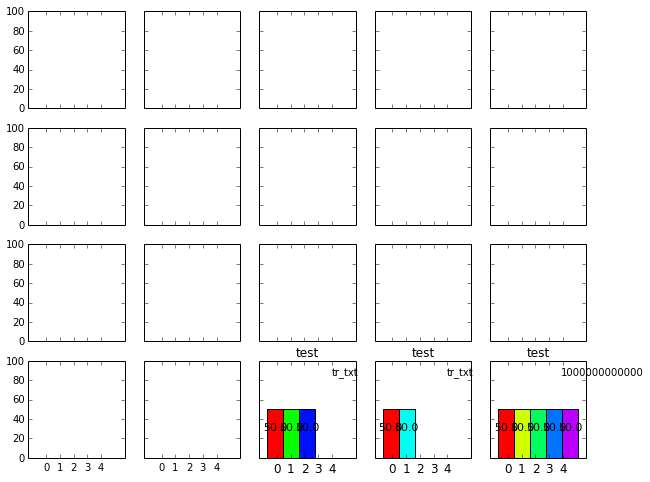

In [85]:
fig, axs = plt.subplots(nrows=4,ncols=5,figsize=(10,8),sharex=True,sharey=True)
axs = axs.ravel()
ax_bar_chart(axs[-3],[50,50,50],["0","1","2"],"survived",'COUNT(id)',"test","tr_txt")
ax_bar_chart(axs[-2],[50,50],["0","1"],"survived",'COUNT(id)',"test","tr_txt")
ax_bar_chart(axs[-1],[50,50,50,50,50],["0","1","2","3","4"],"survived",'COUNT(id)',"test",1000000000000)

In [15]:
mkdir dashboards

In [116]:
import math

millnames = ['','E3',' E6',' E9','E12']

def millify(n):
    n = float(n)
    millidx = max(0,min(len(millnames)-1,
                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))
    if millidx<2:
        return int(n)
    else:
        return '{:.0f}{}'.format(n / 10**(3 * millidx), millnames[millidx])

In [117]:
def generateDashboard(nodeDicStr,xlabel,ylabel,numBars,title,fname=""):    
    nodeDic=json.loads(nodeDicStr)
    fig, axs = plt.subplots(nrows=4,ncols=5,figsize=(10,8),sharex=True,sharey=True)
    axs = axs.ravel()
    xAttrs = []
    yValsLsts = []
    filterLsts = []
    popSizeLsts = [] 
    for it,node in enumerate(nodeDic.values()):
        yVals =[]
        filterName=""
        for i,bar in enumerate(node): 
            if i<numBars:
                if it==0:
                    xAttrs.append(bar["xAxis"])
                yVals.append(bar["yAxis"])
            if i==numBars:
                filterName=bar['filter']
                if filterName=="#":
                    filterName="Root"
                else:
                    filterName=string.join(filterName.split("#")[1:-1],";\n").replace("$","=")
                popSize = bar["populationSize"]
        yValsLsts.append(yVals)
        filterLsts.append(filterName)
        popSizeLsts.append(popSize)
    level = [f.count(";")+1 for f in filterLsts]
    sortedIdx = list(np.argsort(level))
    try:
        rootIdx = filterLsts.index("Root")
        sortedIdx.remove(rootIdx)
        sortedIdx = np.array([rootIdx]+sortedIdx)
    except(ValueError):
        print "no root? "
        sortedIdx = np.array(sortedIdx)
    filterLsts= np.array(filterLsts)[sortedIdx]
    yValsLsts =  np.array(yValsLsts)[sortedIdx]
    popSizeLsts = np.array(popSizeLsts)[sortedIdx]
    for ax,yVals,filterName,popSize in zip(axs,yValsLsts,filterLsts,popSizeLsts):
        ax_bar_chart(ax,yVals,xAttrs,"survived",'COUNT(id)',filterName,millify(popSize))
    fig.text(0.5, -0.01, xlabel, ha='center',fontsize=14)
    fig.text(-0.01, 0.5, ylabel, va='center', rotation='vertical',fontsize=14)
    fig.text(0.5, 1, title, ha='center',fontsize=14)
    plt.tight_layout(rect=[0.01, 0.01, 1, 1])
    if fname!="": plt.savefig("dashboards/"+fname,bbox_inches='tight')

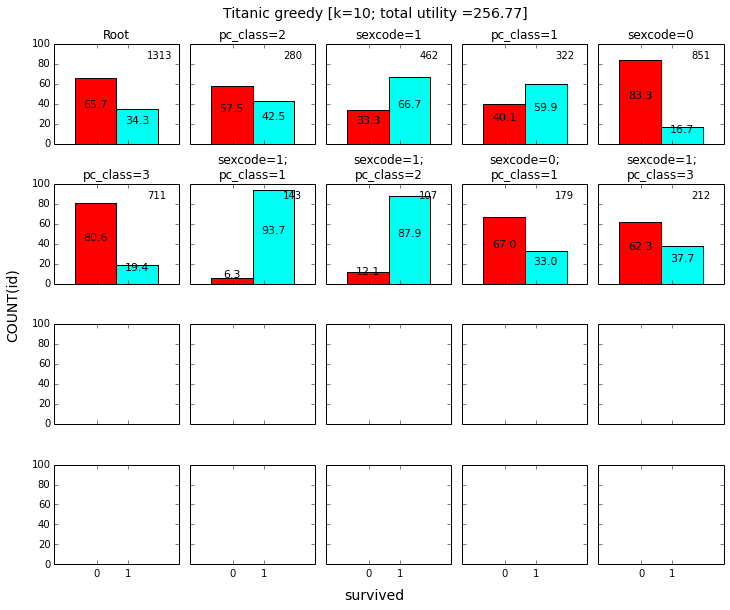

In [118]:
nodeDicStr="{\"1\": [{ \"xAxis\": \"0\", \"yAxis\":65.72734196496572},{ \"xAxis\": \"1\", \"yAxis\":34.27265803503427},{\"childrenIndex\":[1, 2, 3, 4, 5], \"populationSize\":1313.0, \"filter\":\"#\",\"yName\":\"COUNT(id)\"}],\"2\": [{ \"xAxis\": \"0\", \"yAxis\":33.33333333333333},{ \"xAxis\": \"1\", \"yAxis\":66.66666666666666},{\"childrenIndex\":[9, 10], \"populationSize\":462.0, \"filter\":\"#sexcode$1#\",\"yName\":\"COUNT(id)\"}],\"3\": [{ \"xAxis\": \"0\", \"yAxis\":6.293706293706294},{ \"xAxis\": \"1\", \"yAxis\":93.7062937062937},{\"childrenIndex\":[], \"populationSize\":143.0, \"filter\":\"#sexcode$1#pc_class$1#\",\"yName\":\"COUNT(id)\"}],\"4\": [{ \"xAxis\": \"0\", \"yAxis\":40.06211180124223},{ \"xAxis\": \"1\", \"yAxis\":59.93788819875776},{\"childrenIndex\":[9], \"populationSize\":322.0, \"filter\":\"#pc_class$1#\",\"yName\":\"COUNT(id)\"}],\"5\": [{ \"xAxis\": \"0\", \"yAxis\":12.149532710280374},{ \"xAxis\": \"1\", \"yAxis\":87.85046728971963},{\"childrenIndex\":[], \"populationSize\":107.0, \"filter\":\"#sexcode$1#pc_class$2#\",\"yName\":\"COUNT(id)\"}],\"6\": [{ \"xAxis\": \"0\", \"yAxis\":83.31374853113984},{ \"xAxis\": \"1\", \"yAxis\":16.686251468860164},{\"childrenIndex\":[6, 7, 8], \"populationSize\":851.0, \"filter\":\"#sexcode$0#\",\"yName\":\"COUNT(id)\"}],\"7\": [{ \"xAxis\": \"0\", \"yAxis\":67.0391061452514},{ \"xAxis\": \"1\", \"yAxis\":32.960893854748605},{\"childrenIndex\":[], \"populationSize\":179.0, \"filter\":\"#sexcode$0#pc_class$1#\",\"yName\":\"COUNT(id)\"}],\"8\": [{ \"xAxis\": \"0\", \"yAxis\":80.59071729957806},{ \"xAxis\": \"1\", \"yAxis\":19.40928270042194},{\"childrenIndex\":[11], \"populationSize\":711.0, \"filter\":\"#pc_class$3#\",\"yName\":\"COUNT(id)\"}],\"9\": [{ \"xAxis\": \"0\", \"yAxis\":62.264150943396224},{ \"xAxis\": \"1\", \"yAxis\":37.735849056603776},{\"childrenIndex\":[], \"populationSize\":212.0, \"filter\":\"#sexcode$1#pc_class$3#\",\"yName\":\"COUNT(id)\"}],\"10\": [{ \"xAxis\": \"0\", \"yAxis\":57.49999999999999},{ \"xAxis\": \"1\", \"yAxis\":42.5},{\"childrenIndex\":[], \"populationSize\":280.0, \"filter\":\"#pc_class$2#\",\"yName\":\"COUNT(id)\"}]}"
generateDashboard(nodeDicStr,"survived","COUNT(id)",2,"Titanic greedy [k=10; total utility =256.77]","titanic_greedy_10.pdf")

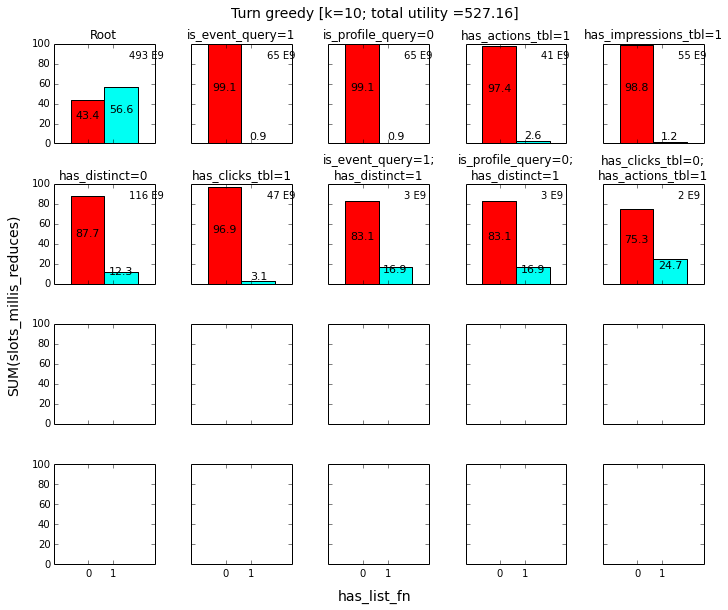

In [119]:
nodeDicStr="{\"1\": [{ \"xAxis\": \"0\", \"yAxis\":43.40789274938343},{ \"xAxis\": \"1\", \"yAxis\":56.59210725061657},{\"childrenIndex\":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], \"populationSize\":492526704188, \"filter\":\"#\",\"yName\":\"COUNT(id)\"}],\"2\": [{ \"xAxis\": \"0\", \"yAxis\":99.09927735409117},{ \"xAxis\": \"1\", \"yAxis\":0.9007226459088256},{\"childrenIndex\":[15, 17, 39, 41, 42, 45, 46, 49, 50, 53, 54], \"populationSize\":65236316603, \"filter\":\"#is_profile_query$0#\",\"yName\":\"COUNT(id)\"}],\"3\": [{ \"xAxis\": \"0\", \"yAxis\":99.09927735409117},{ \"xAxis\": \"1\", \"yAxis\":0.9007226459088256},{\"childrenIndex\":[20, 22, 39, 59, 60, 63, 64, 67, 68, 71, 72], \"populationSize\":65236316603, \"filter\":\"#is_event_query$1#\",\"yName\":\"COUNT(id)\"}],\"4\": [{ \"xAxis\": \"0\", \"yAxis\":98.84352038584385},{ \"xAxis\": \"1\", \"yAxis\":1.156479614156162},{\"childrenIndex\":[24, 26, 75, 76, 79, 80, 83], \"populationSize\":55050620539, \"filter\":\"#has_impressions_tbl$1#\",\"yName\":\"COUNT(id)\"}],\"5\": [{ \"xAxis\": \"0\", \"yAxis\":97.3967736584429},{ \"xAxis\": \"1\", \"yAxis\":2.603226341557092},{\"childrenIndex\":[32, 34, 86, 88, 95], \"populationSize\":40822641890, \"filter\":\"#has_actions_tbl$1#\",\"yName\":\"COUNT(id)\"}],\"6\": [{ \"xAxis\": \"0\", \"yAxis\":96.88446968269615},{ \"xAxis\": \"1\", \"yAxis\":3.115530317303848},{\"childrenIndex\":[28, 30, 87, 91], \"populationSize\":46966523512, \"filter\":\"#has_clicks_tbl$1#\",\"yName\":\"COUNT(id)\"}],\"7\": [{ \"xAxis\": \"0\", \"yAxis\":87.72514337314605},{ \"xAxis\": \"1\", \"yAxis\":12.27485662685395},{\"childrenIndex\":[35, 37, 55, 69, 81, 89, 93], \"populationSize\":115838325255, \"filter\":\"#has_distinct$0#\",\"yName\":\"COUNT(id)\"}],\"8\": [{ \"xAxis\": \"0\", \"yAxis\":75.32614526552202},{ \"xAxis\": \"1\", \"yAxis\":24.673854734477988},{\"childrenIndex\":[190, 194], \"populationSize\":2150203143, \"filter\":\"#has_clicks_tbl$0#has_actions_tbl$1#\",\"yName\":\"COUNT(id)\"}],\"9\": [{ \"xAxis\": \"0\", \"yAxis\":83.05518309757069},{ \"xAxis\": \"1\", \"yAxis\":16.944816902429306},{\"childrenIndex\":[226, 246, 262, 270], \"populationSize\":2554145657, \"filter\":\"#is_profile_query$0#has_distinct$1#\",\"yName\":\"COUNT(id)\"}],\"10\": [{ \"xAxis\": \"0\", \"yAxis\":83.05518309757069},{ \"xAxis\": \"1\", \"yAxis\":16.944816902429306},{\"childrenIndex\":[226, 298, 314, 322], \"populationSize\":2554145657, \"filter\":\"#is_event_query$1#has_distinct$1#\",\"yName\":\"COUNT(id)\"}]}"
generateDashboard(nodeDicStr,"has_list_fn","SUM(slots_millis_reduces)",2,"Turn greedy [k=10; total utility =527.16]","turn_greedy_10.pdf")

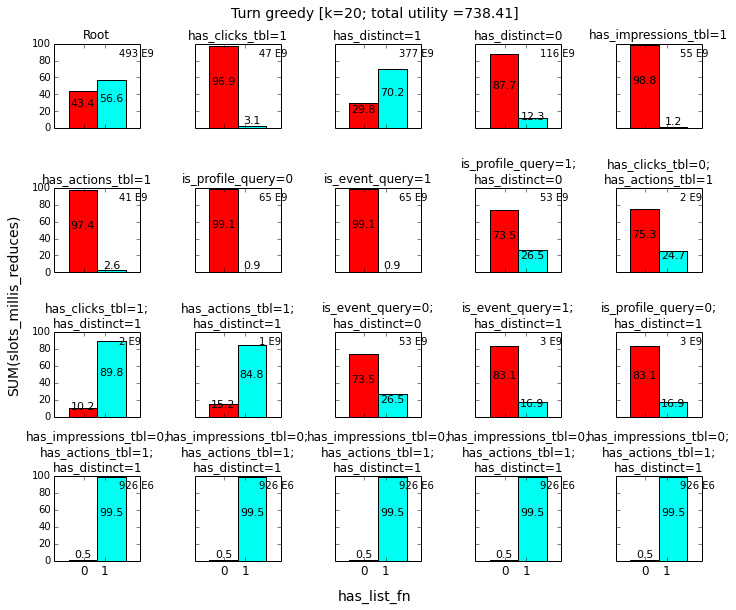

In [120]:
nodeDicStr="{\"1\": [{ \"xAxis\": \"0\", \"yAxis\":43.40789274938343},{ \"xAxis\": \"1\", \"yAxis\":56.59210725061657},{\"childrenIndex\":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], \"populationSize\":492526704188, \"filter\":\"#\",\"yName\":\"COUNT(id)\"}],\"2\": [{ \"xAxis\": \"0\", \"yAxis\":99.09927735409117},{ \"xAxis\": \"1\", \"yAxis\":0.9007226459088256},{\"childrenIndex\":[15, 17, 39, 41, 42, 45, 46, 49, 50, 53, 54], \"populationSize\":65236316603, \"filter\":\"#is_profile_query$0#\",\"yName\":\"COUNT(id)\"}],\"3\": [{ \"xAxis\": \"0\", \"yAxis\":99.09927735409117},{ \"xAxis\": \"1\", \"yAxis\":0.9007226459088256},{\"childrenIndex\":[20, 22, 39, 59, 60, 63, 64, 67, 68, 71, 72], \"populationSize\":65236316603, \"filter\":\"#is_event_query$1#\",\"yName\":\"COUNT(id)\"}],\"4\": [{ \"xAxis\": \"0\", \"yAxis\":98.84352038584385},{ \"xAxis\": \"1\", \"yAxis\":1.156479614156162},{\"childrenIndex\":[24, 26, 75, 76, 79, 80, 83], \"populationSize\":55050620539, \"filter\":\"#has_impressions_tbl$1#\",\"yName\":\"COUNT(id)\"}],\"5\": [{ \"xAxis\": \"0\", \"yAxis\":97.3967736584429},{ \"xAxis\": \"1\", \"yAxis\":2.603226341557092},{\"childrenIndex\":[32, 34, 86, 88, 95], \"populationSize\":40822641890, \"filter\":\"#has_actions_tbl$1#\",\"yName\":\"COUNT(id)\"}],\"6\": [{ \"xAxis\": \"0\", \"yAxis\":96.88446968269615},{ \"xAxis\": \"1\", \"yAxis\":3.115530317303848},{\"childrenIndex\":[28, 30, 87, 91], \"populationSize\":46966523512, \"filter\":\"#has_clicks_tbl$1#\",\"yName\":\"COUNT(id)\"}],\"7\": [{ \"xAxis\": \"0\", \"yAxis\":87.72514337314605},{ \"xAxis\": \"1\", \"yAxis\":12.27485662685395},{\"childrenIndex\":[35, 37, 55, 69, 81, 89, 93], \"populationSize\":115838325255, \"filter\":\"#has_distinct$0#\",\"yName\":\"COUNT(id)\"}],\"8\": [{ \"xAxis\": \"0\", \"yAxis\":75.32614526552202},{ \"xAxis\": \"1\", \"yAxis\":24.673854734477988},{\"childrenIndex\":[190, 194], \"populationSize\":2150203143, \"filter\":\"#has_clicks_tbl$0#has_actions_tbl$1#\",\"yName\":\"COUNT(id)\"}],\"9\": [{ \"xAxis\": \"0\", \"yAxis\":83.05518309757069},{ \"xAxis\": \"1\", \"yAxis\":16.944816902429306},{\"childrenIndex\":[226, 246, 262, 270], \"populationSize\":2554145657, \"filter\":\"#is_profile_query$0#has_distinct$1#\",\"yName\":\"COUNT(id)\"}],\"10\": [{ \"xAxis\": \"0\", \"yAxis\":83.05518309757069},{ \"xAxis\": \"1\", \"yAxis\":16.944816902429306},{\"childrenIndex\":[226, 298, 314, 322], \"populationSize\":2554145657, \"filter\":\"#is_event_query$1#has_distinct$1#\",\"yName\":\"COUNT(id)\"}],\"11\": [{ \"xAxis\": \"0\", \"yAxis\":73.54175531539768},{ \"xAxis\": \"1\", \"yAxis\":26.458244684602324},{\"childrenIndex\":[127, 227, 249, 265, 267, 273], \"populationSize\":53156154309, \"filter\":\"#is_profile_query$1#has_distinct$0#\",\"yName\":\"COUNT(id)\"}],\"12\": [{ \"xAxis\": \"0\", \"yAxis\":73.54175531539768},{ \"xAxis\": \"1\", \"yAxis\":26.458244684602324},{\"childrenIndex\":[157, 227, 293, 309, 311, 317], \"populationSize\":53156154309, \"filter\":\"#is_event_query$0#has_distinct$0#\",\"yName\":\"COUNT(id)\"}],\"13\": [{ \"xAxis\": \"0\", \"yAxis\":29.77955596154781},{ \"xAxis\": \"1\", \"yAxis\":70.22044403845219},{\"childrenIndex\":[36, 38, 56, 70, 82, 84, 90, 92, 94, 96], \"populationSize\":376688378933, \"filter\":\"#has_distinct$1#\",\"yName\":\"COUNT(id)\"}],\"14\": [{ \"xAxis\": \"0\", \"yAxis\":10.245557411390175},{ \"xAxis\": \"1\", \"yAxis\":89.75444258860983},{\"childrenIndex\":[200, 354], \"populationSize\":1565556168, \"filter\":\"#has_clicks_tbl$1#has_distinct$1#\",\"yName\":\"COUNT(id)\"}],\"15\": [{ \"xAxis\": \"0\", \"yAxis\":15.164093658579409},{ \"xAxis\": \"1\", \"yAxis\":84.8359063414206},{\"childrenIndex\":[208, 344, 352, 356], \"populationSize\":1086297920, \"filter\":\"#has_actions_tbl$1#has_distinct$1#\",\"yName\":\"COUNT(id)\"}],\"16\": [{ \"xAxis\": \"0\", \"yAxis\":0.5184888475114967},{ \"xAxis\": \"1\", \"yAxis\":99.4815111524885},{\"childrenIndex\":[614, 622, 818, 822], \"populationSize\":926373831, \"filter\":\"#has_impressions_tbl$0#has_actions_tbl$1#has_distinct$1#\",\"yName\":\"COUNT(id)\"}],\"17\": [{ \"xAxis\": \"0\", \"yAxis\":0.5184888475114967},{ \"xAxis\": \"1\", \"yAxis\":99.4815111524885},{\"childrenIndex\":[614, 622, 818, 822], \"populationSize\":926373831, \"filter\":\"#has_impressions_tbl$0#has_actions_tbl$1#has_distinct$1#\",\"yName\":\"COUNT(id)\"}],\"18\": [{ \"xAxis\": \"0\", \"yAxis\":0.5184888475114967},{ \"xAxis\": \"1\", \"yAxis\":99.4815111524885},{\"childrenIndex\":[614, 622, 818, 822], \"populationSize\":926373831, \"filter\":\"#has_impressions_tbl$0#has_actions_tbl$1#has_distinct$1#\",\"yName\":\"COUNT(id)\"}],\"19\": [{ \"xAxis\": \"0\", \"yAxis\":0.5184888475114967},{ \"xAxis\": \"1\", \"yAxis\":99.4815111524885},{\"childrenIndex\":[614, 622, 818, 822], \"populationSize\":926373831, \"filter\":\"#has_impressions_tbl$0#has_actions_tbl$1#has_distinct$1#\",\"yName\":\"COUNT(id)\"}],\"20\": [{ \"xAxis\": \"0\", \"yAxis\":0.5184888475114967},{ \"xAxis\": \"1\", \"yAxis\":99.4815111524885},{\"childrenIndex\":[614, 622, 818, 822], \"populationSize\":926373831, \"filter\":\"#has_impressions_tbl$0#has_actions_tbl$1#has_distinct$1#\",\"yName\":\"COUNT(id)\"}]}"
generateDashboard(nodeDicStr,"has_list_fn","SUM(slots_millis_reduces)",2,"Turn greedy [k=20; total utility =738.41]","turn_greedy_20.pdf")

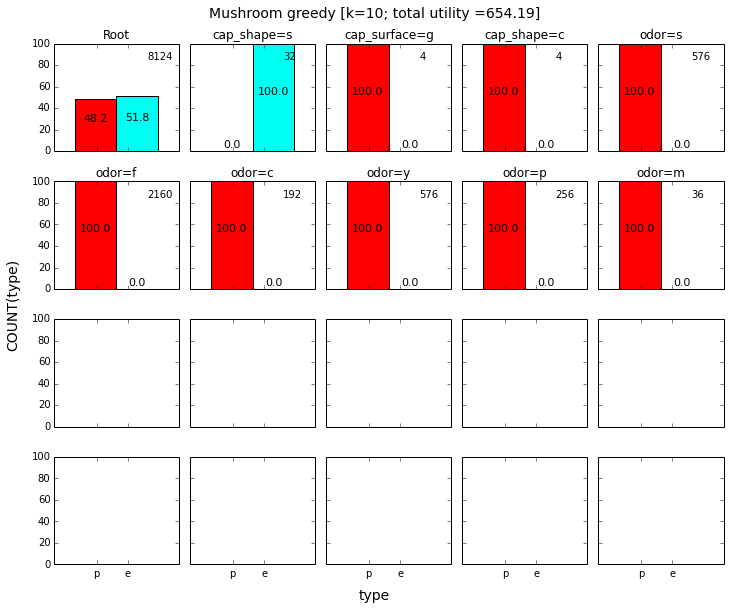

In [121]:
nodeDicStr="{\"1\": [{ \"xAxis\": \"p\", \"yAxis\":48.20285573609059},{ \"xAxis\": \"e\", \"yAxis\":51.7971442639094},{\"childrenIndex\":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], \"populationSize\":8124.0, \"filter\":\"#\",\"yName\":\"COUNT(id)\"}],\"2\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[39, 40, 66, 67, 92, 93, 111], \"populationSize\":4.0, \"filter\":\"#cap_shape$c#\",\"yName\":\"COUNT(id)\"}],\"3\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[35, 40, 44, 49, 151, 158, 180], \"populationSize\":4.0, \"filter\":\"#cap_surface$g#\",\"yName\":\"COUNT(id)\"}],\"4\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[104, 113, 120, 161, 169, 177, 200, 205, 208, 214, 221, 226, 234, 238], \"populationSize\":2160.0, \"filter\":\"#odor$f#\",\"yName\":\"COUNT(id)\"}],\"5\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[105, 114, 121, 162, 170, 209, 215, 239], \"populationSize\":576.0, \"filter\":\"#odor$s#\",\"yName\":\"COUNT(id)\"}],\"6\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[106, 115, 122, 163, 171, 210, 216, 240], \"populationSize\":576.0, \"filter\":\"#odor$y#\",\"yName\":\"COUNT(id)\"}],\"7\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[107, 172, 178, 201, 222, 231, 241], \"populationSize\":192.0, \"filter\":\"#odor$c#\",\"yName\":\"COUNT(id)\"}],\"8\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[108, 116, 123, 164, 211, 217, 229, 242], \"populationSize\":36.0, \"filter\":\"#odor$m#\",\"yName\":\"COUNT(id)\"}],\"9\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[110, 125, 166, 174, 203, 219, 236], \"populationSize\":256.0, \"filter\":\"#odor$p#\",\"yName\":\"COUNT(id)\"}],\"10\": [{ \"xAxis\": \"p\", \"yAxis\":0.0},{ \"xAxis\": \"e\", \"yAxis\":100.0},{\"childrenIndex\":[45, 76, 77, 96, 117], \"populationSize\":32.0, \"filter\":\"#cap_shape$s#\",\"yName\":\"COUNT(id)\"}]}"
generateDashboard(nodeDicStr,"type","COUNT(type)",2,"Mushroom greedy [k=10; total utility =654.19]","mushroom_greedy_10.pdf")

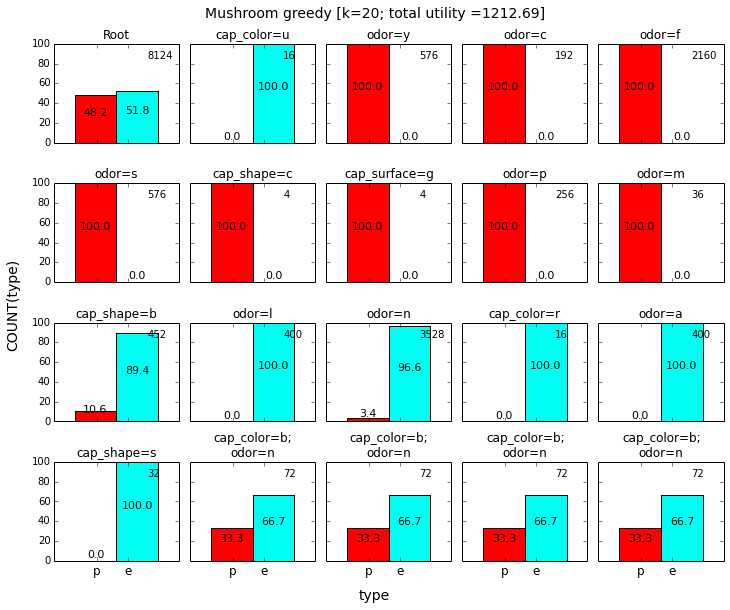

In [122]:
nodeDicStr="{\"1\": [{ \"xAxis\": \"p\", \"yAxis\":48.20285573609059},{ \"xAxis\": \"e\", \"yAxis\":51.7971442639094},{\"childrenIndex\":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], \"populationSize\":8124.0, \"filter\":\"#\",\"yName\":\"COUNT(id)\"}],\"2\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[39, 40, 66, 67, 92, 93, 111], \"populationSize\":4.0, \"filter\":\"#cap_shape$c#\",\"yName\":\"COUNT(id)\"}],\"3\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[35, 40, 44, 49, 151, 158, 180], \"populationSize\":4.0, \"filter\":\"#cap_surface$g#\",\"yName\":\"COUNT(id)\"}],\"4\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[104, 113, 120, 161, 169, 177, 200, 205, 208, 214, 221, 226, 234, 238], \"populationSize\":2160.0, \"filter\":\"#odor$f#\",\"yName\":\"COUNT(id)\"}],\"5\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[105, 114, 121, 162, 170, 209, 215, 239], \"populationSize\":576.0, \"filter\":\"#odor$s#\",\"yName\":\"COUNT(id)\"}],\"6\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[106, 115, 122, 163, 171, 210, 216, 240], \"populationSize\":576.0, \"filter\":\"#odor$y#\",\"yName\":\"COUNT(id)\"}],\"7\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[107, 172, 178, 201, 222, 231, 241], \"populationSize\":192.0, \"filter\":\"#odor$c#\",\"yName\":\"COUNT(id)\"}],\"8\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[108, 116, 123, 164, 211, 217, 229, 242], \"populationSize\":36.0, \"filter\":\"#odor$m#\",\"yName\":\"COUNT(id)\"}],\"9\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[110, 125, 166, 174, 203, 219, 236], \"populationSize\":256.0, \"filter\":\"#odor$p#\",\"yName\":\"COUNT(id)\"}],\"10\": [{ \"xAxis\": \"p\", \"yAxis\":0.0},{ \"xAxis\": \"e\", \"yAxis\":100.0},{\"childrenIndex\":[45, 76, 77, 96, 117], \"populationSize\":32.0, \"filter\":\"#cap_shape$s#\",\"yName\":\"COUNT(id)\"}],\"11\": [{ \"xAxis\": \"p\", \"yAxis\":0.0},{ \"xAxis\": \"e\", \"yAxis\":100.0},{\"childrenIndex\":[58, 80, 128, 184, 206], \"populationSize\":16.0, \"filter\":\"#cap_color$u#\",\"yName\":\"COUNT(id)\"}],\"12\": [{ \"xAxis\": \"p\", \"yAxis\":0.0},{ \"xAxis\": \"e\", \"yAxis\":100.0},{\"childrenIndex\":[62, 84, 132, 191, 223], \"populationSize\":16.0, \"filter\":\"#cap_color$r#\",\"yName\":\"COUNT(id)\"}],\"13\": [{ \"xAxis\": \"p\", \"yAxis\":0.0},{ \"xAxis\": \"e\", \"yAxis\":100.0},{\"childrenIndex\":[99, 102, 118, 159, 167, 175, 198, 212, 224, 232], \"populationSize\":400.0, \"filter\":\"#odor$a#\",\"yName\":\"COUNT(id)\"}],\"14\": [{ \"xAxis\": \"p\", \"yAxis\":0.0},{ \"xAxis\": \"e\", \"yAxis\":100.0},{\"childrenIndex\":[101, 109, 124, 165, 173, 179, 202, 218, 227, 235], \"populationSize\":400.0, \"filter\":\"#odor$l#\",\"yName\":\"COUNT(id)\"}],\"15\": [{ \"xAxis\": \"p\", \"yAxis\":3.4013605442176873},{ \"xAxis\": \"e\", \"yAxis\":96.5986394557823},{\"childrenIndex\":[103, 112, 119, 160, 168, 176, 199, 204, 207, 213, 220, 228, 230, 233, 237], \"populationSize\":3528.0, \"filter\":\"#odor$n#\",\"yName\":\"COUNT(id)\"}],\"16\": [{ \"xAxis\": \"p\", \"yAxis\":10.619469026548673},{ \"xAxis\": \"e\", \"yAxis\":89.38053097345133},{\"childrenIndex\":[32, 33, 34, 50, 52, 53, 54, 88, 89, 100], \"populationSize\":452.0, \"filter\":\"#cap_shape$b#\",\"yName\":\"COUNT(id)\"}],\"17\": [{ \"xAxis\": \"p\", \"yAxis\":33.33333333333333},{ \"xAxis\": \"e\", \"yAxis\":66.66666666666666},{\"childrenIndex\":[551, 656, 687, 755], \"populationSize\":72.0, \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}],\"18\": [{ \"xAxis\": \"p\", \"yAxis\":33.33333333333333},{ \"xAxis\": \"e\", \"yAxis\":66.66666666666666},{\"childrenIndex\":[551, 656, 687, 755], \"populationSize\":72.0, \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}],\"19\": [{ \"xAxis\": \"p\", \"yAxis\":33.33333333333333},{ \"xAxis\": \"e\", \"yAxis\":66.66666666666666},{\"childrenIndex\":[551, 656, 687, 755], \"populationSize\":72.0, \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}],\"20\": [{ \"xAxis\": \"p\", \"yAxis\":33.33333333333333},{ \"xAxis\": \"e\", \"yAxis\":66.66666666666666},{\"childrenIndex\":[551, 656, 687, 755], \"populationSize\":72.0, \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}]}"
generateDashboard(nodeDicStr,"type","COUNT(type)",2,"Mushroom greedy [k=20; total utility =1212.69]","mushroom_greedy_20.pdf")

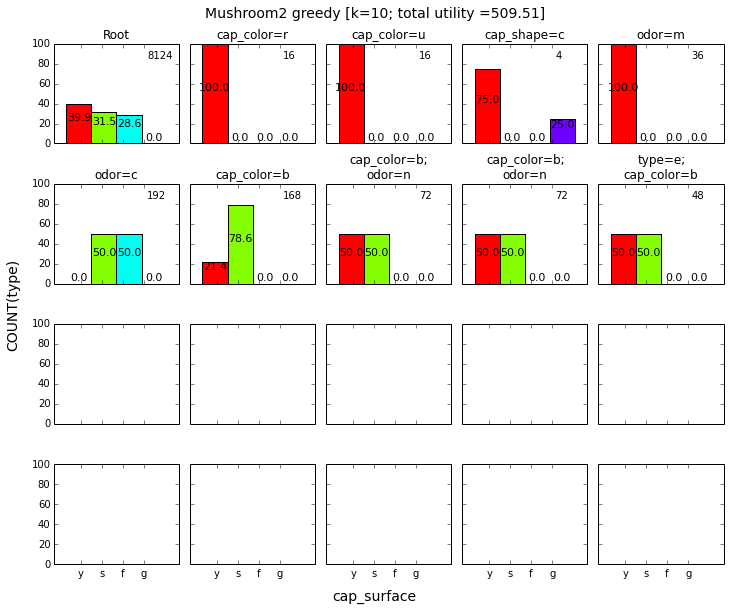

In [123]:
nodeDicStr="{\"1\": [{ \"xAxis\": \"y\", \"yAxis\":39.931068439192515},{ \"xAxis\": \"s\", \"yAxis\":31.462333825701627},{ \"xAxis\": \"f\", \"yAxis\":28.55736090595766},{ \"xAxis\": \"g\", \"yAxis\":0.04923682914820286},{\"childrenIndex\":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], \"populationSize\":8124.0, \"filter\":\"#\",\"yName\":\"COUNT(id)\"}],\"2\": [{ \"xAxis\": \"y\", \"yAxis\":100.0},{ \"xAxis\": \"s\", \"yAxis\":0.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[48, 78, 98, 145, 167], \"populationSize\":16.0, \"filter\":\"#cap_color$u#\",\"yName\":\"COUNT(id)\"}],\"3\": [{ \"xAxis\": \"y\", \"yAxis\":100.0},{ \"xAxis\": \"s\", \"yAxis\":0.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[52, 82, 102, 152, 184], \"populationSize\":16.0, \"filter\":\"#cap_color$r#\",\"yName\":\"COUNT(id)\"}],\"4\": [{ \"xAxis\": \"y\", \"yAxis\":100.0},{ \"xAxis\": \"s\", \"yAxis\":0.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[65, 125, 133, 139, 172, 178, 190, 203], \"populationSize\":36.0, \"filter\":\"#odor$m#\",\"yName\":\"COUNT(id)\"}],\"5\": [{ \"xAxis\": \"y\", \"yAxis\":75.0},{ \"xAxis\": \"s\", \"yAxis\":0.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":25.0},{\"childrenIndex\":[31, 86, 87, 110, 111, 128], \"populationSize\":4.0, \"filter\":\"#cap_shape$c#\",\"yName\":\"COUNT(id)\"}],\"6\": [{ \"xAxis\": \"y\", \"yAxis\":21.428571428571427},{ \"xAxis\": \"s\", \"yAxis\":78.57142857142857},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[39, 47, 77, 97, 144, 165, 166], \"populationSize\":168.0, \"filter\":\"#cap_color$b#\",\"yName\":\"COUNT(id)\"}],\"7\": [{ \"xAxis\": \"y\", \"yAxis\":0.0},{ \"xAxis\": \"s\", \"yAxis\":50.0},{ \"xAxis\": \"f\", \"yAxis\":50.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[64, 124, 162, 183, 192, 202], \"populationSize\":192.0, \"filter\":\"#odor$c#\",\"yName\":\"COUNT(id)\"}],\"8\": [{ \"xAxis\": \"y\", \"yAxis\":50.0},{ \"xAxis\": \"s\", \"yAxis\":50.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[237, 247, 254, 325, 363], \"populationSize\":48.0, \"filter\":\"#type$e#cap_color$b#\",\"yName\":\"COUNT(id)\"}],\"9\": [{ \"xAxis\": \"y\", \"yAxis\":50.0},{ \"xAxis\": \"s\", \"yAxis\":50.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[341, 363, 445, 458, 489, 510, 576], \"populationSize\":72.0, \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}],\"10\": [{ \"xAxis\": \"y\", \"yAxis\":50.0},{ \"xAxis\": \"s\", \"yAxis\":50.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[341, 363, 445, 458, 489, 510, 576], \"populationSize\":72.0, \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}]}"
generateDashboard(nodeDicStr,"cap_surface","COUNT(type)",4,"Mushroom2 greedy [k=10; total utility =509.51]","mushroom2_greedy_10.pdf")

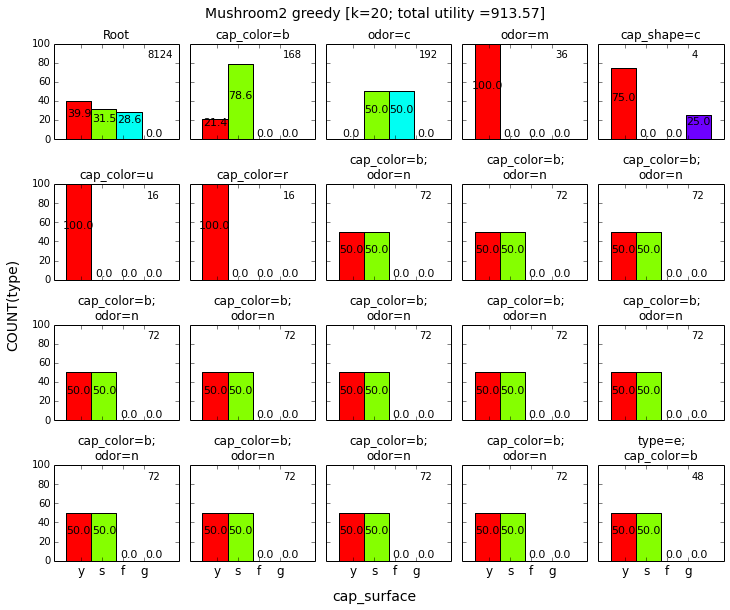

In [124]:
nodeDicStr="{\"1\": [{ \"xAxis\": \"y\", \"yAxis\":39.931068439192515},{ \"xAxis\": \"s\", \"yAxis\":31.462333825701627},{ \"xAxis\": \"f\", \"yAxis\":28.55736090595766},{ \"xAxis\": \"g\", \"yAxis\":0.04923682914820286},{\"childrenIndex\":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], \"populationSize\":8124.0, \"filter\":\"#\",\"yName\":\"COUNT(id)\"}],\"2\": [{ \"xAxis\": \"y\", \"yAxis\":100.0},{ \"xAxis\": \"s\", \"yAxis\":0.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[48, 78, 98, 145, 167], \"populationSize\":16.0, \"filter\":\"#cap_color$u#\",\"yName\":\"COUNT(id)\"}],\"3\": [{ \"xAxis\": \"y\", \"yAxis\":100.0},{ \"xAxis\": \"s\", \"yAxis\":0.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[52, 82, 102, 152, 184], \"populationSize\":16.0, \"filter\":\"#cap_color$r#\",\"yName\":\"COUNT(id)\"}],\"4\": [{ \"xAxis\": \"y\", \"yAxis\":100.0},{ \"xAxis\": \"s\", \"yAxis\":0.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[65, 125, 133, 139, 172, 178, 190, 203], \"populationSize\":36.0, \"filter\":\"#odor$m#\",\"yName\":\"COUNT(id)\"}],\"5\": [{ \"xAxis\": \"y\", \"yAxis\":75.0},{ \"xAxis\": \"s\", \"yAxis\":0.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":25.0},{\"childrenIndex\":[31, 86, 87, 110, 111, 128], \"populationSize\":4.0, \"filter\":\"#cap_shape$c#\",\"yName\":\"COUNT(id)\"}],\"6\": [{ \"xAxis\": \"y\", \"yAxis\":21.428571428571427},{ \"xAxis\": \"s\", \"yAxis\":78.57142857142857},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[39, 47, 77, 97, 144, 165, 166], \"populationSize\":168.0, \"filter\":\"#cap_color$b#\",\"yName\":\"COUNT(id)\"}],\"7\": [{ \"xAxis\": \"y\", \"yAxis\":0.0},{ \"xAxis\": \"s\", \"yAxis\":50.0},{ \"xAxis\": \"f\", \"yAxis\":50.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[64, 124, 162, 183, 192, 202], \"populationSize\":192.0, \"filter\":\"#odor$c#\",\"yName\":\"COUNT(id)\"}],\"8\": [{ \"xAxis\": \"y\", \"yAxis\":50.0},{ \"xAxis\": \"s\", \"yAxis\":50.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[237, 247, 254, 325, 363], \"populationSize\":48.0, \"filter\":\"#type$e#cap_color$b#\",\"yName\":\"COUNT(id)\"}],\"9\": [{ \"xAxis\": \"y\", \"yAxis\":50.0},{ \"xAxis\": \"s\", \"yAxis\":50.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[341, 363, 445, 458, 489, 510, 576], \"populationSize\":72.0, \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}],\"10\": [{ \"xAxis\": \"y\", \"yAxis\":50.0},{ \"xAxis\": \"s\", \"yAxis\":50.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[341, 363, 445, 458, 489, 510, 576], \"populationSize\":72.0, \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}],\"11\": [{ \"xAxis\": \"y\", \"yAxis\":50.0},{ \"xAxis\": \"s\", \"yAxis\":50.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[341, 363, 445, 458, 489, 510, 576], \"populationSize\":72.0, \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}],\"12\": [{ \"xAxis\": \"y\", \"yAxis\":50.0},{ \"xAxis\": \"s\", \"yAxis\":50.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[341, 363, 445, 458, 489, 510, 576], \"populationSize\":72.0, \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}],\"13\": [{ \"xAxis\": \"y\", \"yAxis\":50.0},{ \"xAxis\": \"s\", \"yAxis\":50.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[341, 363, 445, 458, 489, 510, 576], \"populationSize\":72.0, \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}],\"14\": [{ \"xAxis\": \"y\", \"yAxis\":50.0},{ \"xAxis\": \"s\", \"yAxis\":50.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[341, 363, 445, 458, 489, 510, 576], \"populationSize\":72.0, \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}],\"15\": [{ \"xAxis\": \"y\", \"yAxis\":50.0},{ \"xAxis\": \"s\", \"yAxis\":50.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[341, 363, 445, 458, 489, 510, 576], \"populationSize\":72.0, \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}],\"16\": [{ \"xAxis\": \"y\", \"yAxis\":50.0},{ \"xAxis\": \"s\", \"yAxis\":50.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[341, 363, 445, 458, 489, 510, 576], \"populationSize\":72.0, \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}],\"17\": [{ \"xAxis\": \"y\", \"yAxis\":50.0},{ \"xAxis\": \"s\", \"yAxis\":50.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[341, 363, 445, 458, 489, 510, 576], \"populationSize\":72.0, \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}],\"18\": [{ \"xAxis\": \"y\", \"yAxis\":50.0},{ \"xAxis\": \"s\", \"yAxis\":50.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[341, 363, 445, 458, 489, 510, 576], \"populationSize\":72.0, \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}],\"19\": [{ \"xAxis\": \"y\", \"yAxis\":50.0},{ \"xAxis\": \"s\", \"yAxis\":50.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[341, 363, 445, 458, 489, 510, 576], \"populationSize\":72.0, \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}],\"20\": [{ \"xAxis\": \"y\", \"yAxis\":50.0},{ \"xAxis\": \"s\", \"yAxis\":50.0},{ \"xAxis\": \"f\", \"yAxis\":0.0},{ \"xAxis\": \"g\", \"yAxis\":0.0},{\"childrenIndex\":[341, 363, 445, 458, 489, 510, 576], \"populationSize\":72.0, \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}]}"
generateDashboard(nodeDicStr,"cap_surface","COUNT(type)",4,"Mushroom2 greedy [k=20; total utility =913.57]","mushroom2_greedy_20.pdf")